# **Exploratory Data Analysis**

## **1.** **Environment Setup**
  

*   ***Data Manipulation:***  Pandas and Numpy
*   ***Visualization:*** Matplotlib and Seaborn

*   ***Statistical Analysis:*** Stats from Scipy





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

print("Done!")

Done!


## **2.** **Data Preprocessing and Integration**
In this section raw financial datasets are transformed into suitable format for quantitative analysis. This procedure consists 3 primary parts: data cleaning, feature transformation, and data integration.


*   Feature Transformation and Type Casting: Defines helper functions to convert string formatted volume and percentage data into numerical types.
*   Data Loading and Cleaning: Reads the raw data from csv files and parses the data into time-series structure.
* Data Integration: Processed datasets for BIST100 and CSI300 indices are merged into a single data frame. An inner join is performed in order to align the two time series and include only the trading days that where data exists for both markets.


In [ ]:
# This function converts the volume data from "10.0K" to 10000.0
def convert_volume(x):
  if isinstance(x, str):
    x = x.upper().replace(",", "") # removes commas
    if "K" in x:
      return float(x.replace("K", "")) * 1000
    elif "M" in x:
      return float(x.replace("M", "")) * 1000000
    elif "B" in x:
      return float(x.replace("B", "")) * 1000000000
    elif x == "-": # if the volume is missing
      return np.nan
  return float(x)

def convert_change(x):
  if isinstance(x, str):
    x = x.replace("%", "")
  return float(x) / 100

# merging and cleaning function
def load_investing_data(filename):
  df = pd.read_csv(filename)

  # converts date data
  df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
  df = df.set_index("Date").sort_index()

  # remove the commas in the columns
  cols_to_fix = ["Price", "Open", "High", "Low"]
  for col in cols_to_fix:
    if col in df.columns and df[col].dtype == "object":
      df[col] = df[col].str.replace(",", "").astype(float)

  # handle the Volume
  if "Vol." in df.columns:
    df["Vol."] = df["Vol."].apply(convert_volume)

  # handle the Change
  if "Change %" in df.columns:
    df["Change %"] = df["Change %"].apply(convert_change)

  return df[["Price", "Open", "High", "Low", "Vol.", "Change %"]]


print("Loading files:")
df_BIST = load_investing_data("BIST100_data.csv")
df_CSI = load_investing_data("CSI300_data.csv")

df_combined = pd.merge(df_BIST, df_CSI, left_index=True, right_index=True, how="inner", suffixes=("_BIST", "_CSI"))


print(f"Done! Final dataset shape: {df_combined.shape}")
print(f"Columns: {df_combined.columns.to_list()}")
print(df_combined.head())


Loading files:
Done! Final dataset shape: (2349, 12)
Columns: ['Price_BIST', 'Open_BIST', 'High_BIST', 'Low_BIST', 'Vol._BIST', 'Change %_BIST', 'Price_CSI', 'Open_CSI', 'High_CSI', 'Low_CSI', 'Vol._CSI', 'Change %_CSI']
            Price_BIST  Open_BIST  High_BIST  Low_BIST    Vol._BIST  \
Date                                                                  
2015-01-05      864.63     854.95     867.96    854.11  644590000.0   
2015-01-06      869.10     866.51     869.12    855.75  698320000.0   
2015-01-07      867.77     869.25     876.26    864.98  791950000.0   
2015-01-08      876.90     874.05     879.19    872.60  731760000.0   
2015-01-09      876.48     877.46     883.27    874.28  711730000.0   

            Change %_BIST  Price_CSI  Open_CSI  High_CSI  Low_CSI  Vol._CSI  \
Date                                                                          
2015-01-05         0.0117    3641.54   3566.09   3669.04  3551.51  451200.0   
2015-01-06         0.0052    3641.06   3608.

## Data Verification
After merging, we examine the structure of df_combined. The summary below shows that the dataset contains 2,349 shared trading days and that 12 financial attributes are cast to numerical types.

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2349 entries, 2015-01-05 to 2024-12-31
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price_BIST     2349 non-null   float64
 1   Open_BIST      2349 non-null   float64
 2   High_BIST      2349 non-null   float64
 3   Low_BIST       2349 non-null   float64
 4   Vol._BIST      2348 non-null   float64
 5   Change %_BIST  2349 non-null   float64
 6   Price_CSI      2349 non-null   float64
 7   Open_CSI       2349 non-null   float64
 8   High_CSI       2349 non-null   float64
 9   Low_CSI        2349 non-null   float64
 10  Vol._CSI       2349 non-null   float64
 11  Change %_CSI   2349 non-null   float64
dtypes: float64(12)
memory usage: 238.6 KB


## Descriptive Statistics Analysis
We calculate key descriptive statistics for BIST100 and CSI300 daily returns. This analysis includes mean and median to assess central tendency, and standard deviation to measure volatility. Additionally, skewness and kurtosis are computed to identify potential non-normal market behaviour and crask risk.

In [ ]:
cols_to_analyze = ["Change %_BIST", "Change %_CSI"]

stats_summary = df_combined[cols_to_analyze].agg(["mean", "median", "std", "skew", "kurtosis"])

stats_summary.columns = ["BIST100", "CSI300"]

stats_formatted = stats_summary.copy()
stats_formatted.loc[["mean", "median", "std"]] *= 100

print("--- Statistics for Daily Returns ---")
print(stats_formatted.round(4))

--- Statistics for Daily Returns ---
          BIST100  CSI300
mean       0.1042  0.0134
median     0.1500  0.0200
std        1.5704  1.4082
skew      -0.5549 -0.5727
kurtosis   4.5535  6.2108


## **3.** **Visualization:**


---


## Dual-Axis Price Trend:



This code generates a dual-axis to simultaneously visualize the 10-year price trajectories of the BIST100 and CSI300 indices. The BIST100 index is depicted in red, while the CSI300 is displayed in blue with their currencies.

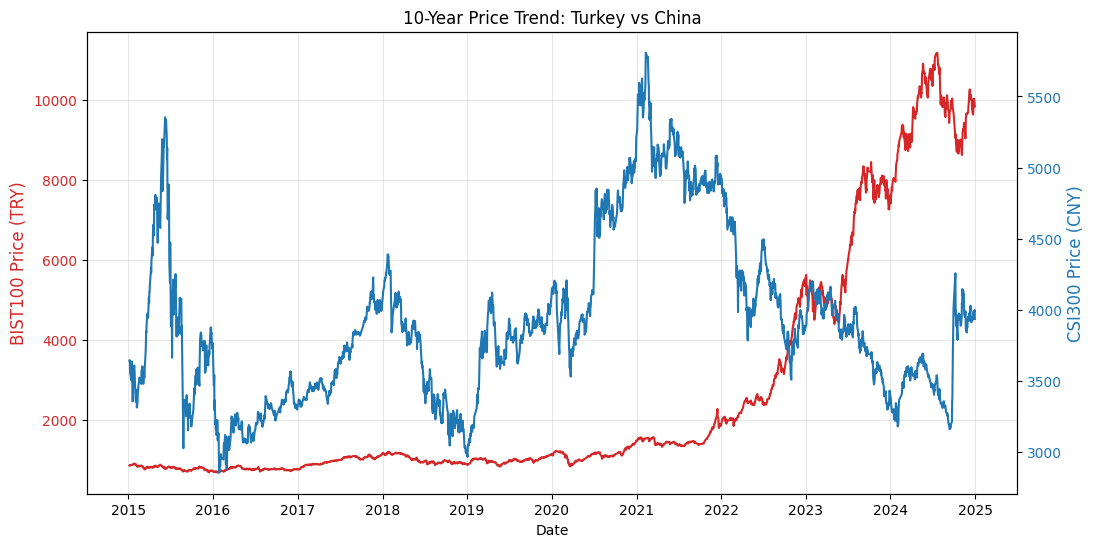

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))

color_bist = "tab:red"
ax1.set_xlabel("Date")
ax1.set_ylabel("BIST100 Price (TRY)", color=color_bist, fontsize=12)
ax1.plot(df_combined.index, df_combined["Price_BIST"], color=color_bist, label="BIST100")
ax1.tick_params(axis="y", labelcolor=color_bist)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
color_csi = "tab:blue"
ax2.set_ylabel("CSI300 Price (CNY)", color=color_csi, fontsize=12)
ax2.plot(df_combined.index, df_combined["Price_CSI"], color=color_csi, label="CSI300")
ax2.tick_params(axis="y", labelcolor=color_csi)

plt.title("10-Year Price Trend: Turkey vs China")
plt.show()

## Correlation Analysis (Scatter Plot):
This code generates a scatter plot with a linear regression line to visually assess the relationship between daily returns of the BIST100 and CSI300 indices.


*   Scatter Points: Each point represents a single day's performence for both markets.
*   Regression Line: The black line represents the "best fit line". Its slope visually indicates the direction and strength of the correlation.



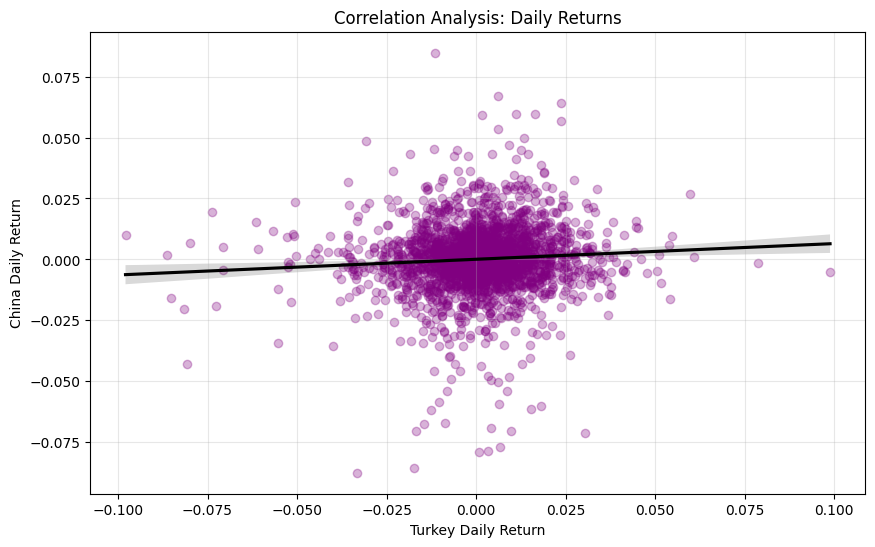

In [ ]:
plt.figure(figsize=(10,6))

sns.regplot(x="Change %_BIST", y="Change %_CSI", data=df_combined, scatter_kws={"alpha": 0.3, "color": "purple"}, line_kws={"color": "black"})

plt.title("Correlation Analysis: Daily Returns")
plt.xlabel("Turkey Daily Return")
plt.ylabel("China Daily Return")
plt.grid(True, alpha=0.3)
plt.show()

## **Return Distribution:**
This code generates an overlapping histogram to compare the statistical distributions of daily returns for BIST100 and CSI300 markets.


*   Histograms: The bars represent the frequency of spesific return values, normalized as a probability density.
*   Overlapping Design: By plotting both distributions on the same axes with transparency, the graph shows the differences in market behavior(flatter, wider curve indicates higher risk/volatility).



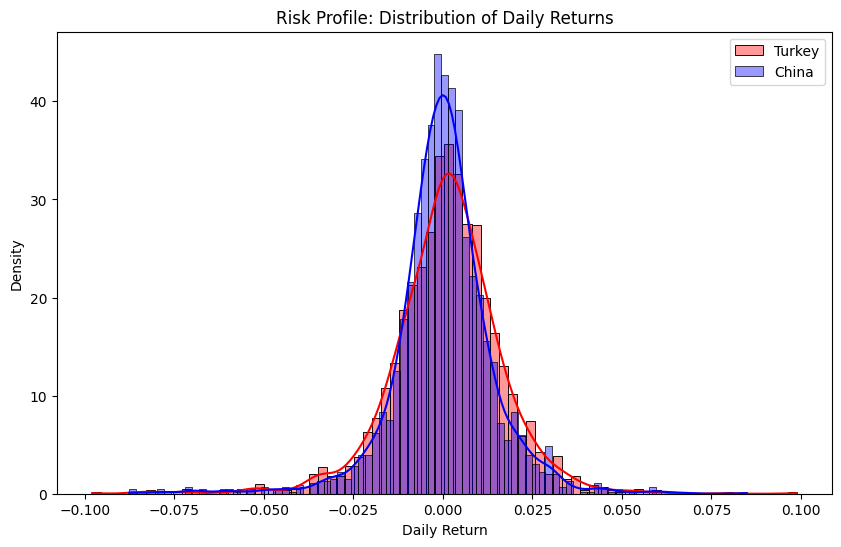

In [ ]:
plt.figure(figsize=(10,6))

sns.histplot(df_combined["Change %_BIST"], color="red", label="Turkey", kde=True, stat="density", alpha=0.4)
sns.histplot(df_combined["Change %_CSI"], color="blue", label="China", kde=True, stat="density", alpha=0.4)

plt.title("Risk Profile: Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.legend()
plt.show()

## Mean Deviation Analysis:
In this part, we depict a mean deviation plot to visualize the daily performance of the BIST100 and CSI300 indices to relative to their respective 10-year averages.


*   First calculates the arithmetic mean of daily returns for each market.
*   For every trading day the deviation from the long-term average of daily return is calculated.
*   The result is plotted, green regions indicate days of outperformance, while red regions denote underperformance. This graph highlights the frequency, duration, and magnitude of volatility relative to the market's tendency.



Turkey Daily Return Mean: 0.0010 (0.10%)
China Daily Reutrn Mean: 0.0001 (0.01%)


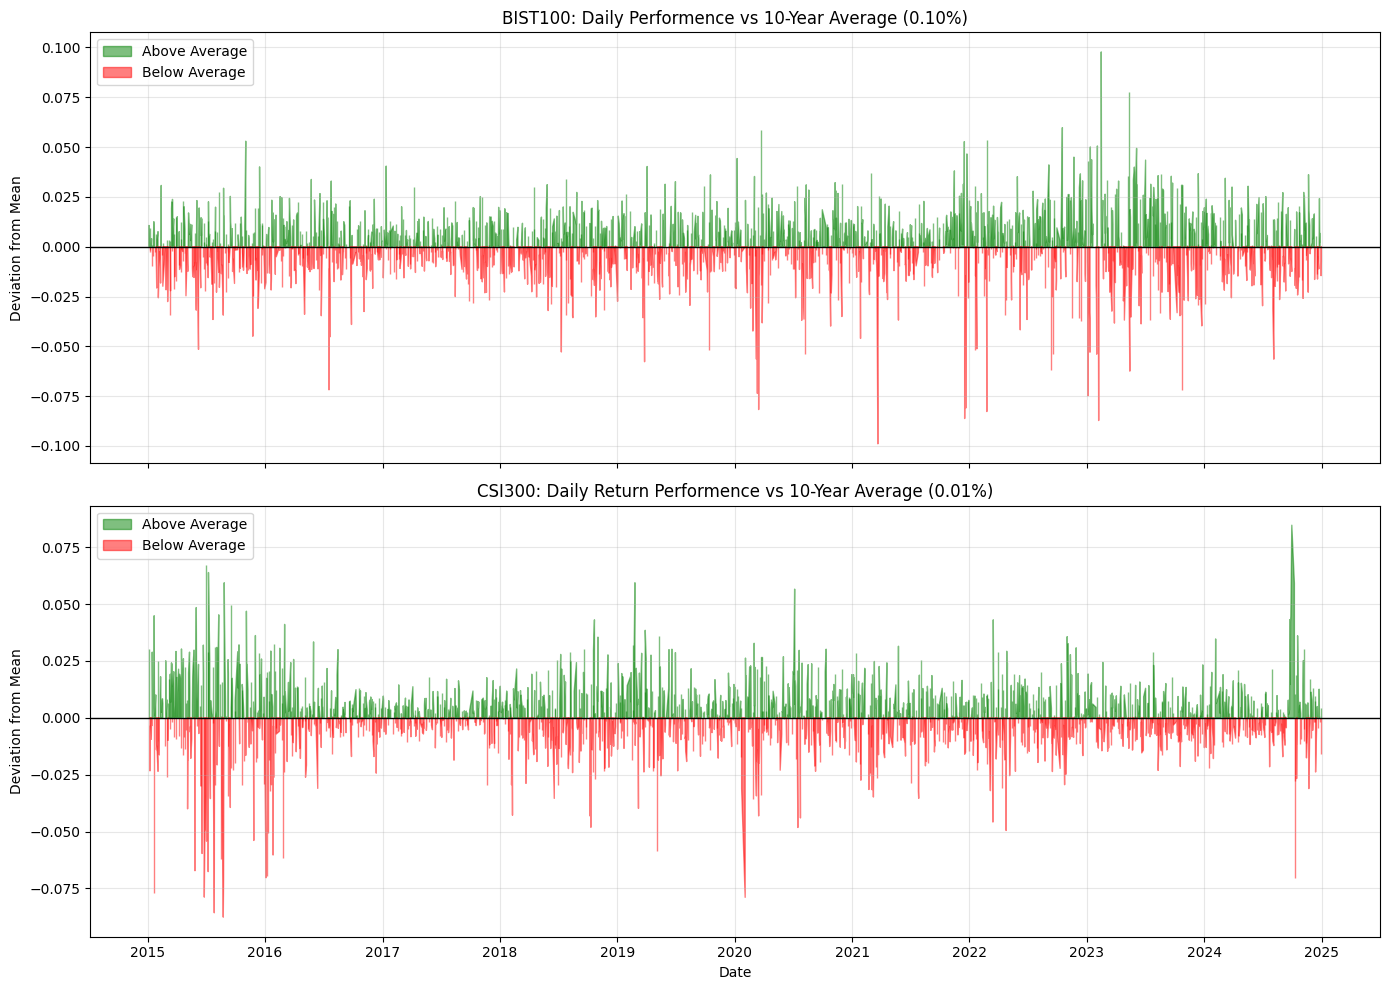

In [ ]:
df_deviation = df_combined.copy()
mean_bist = df_deviation["Change %_BIST"].mean()
mean_csi = df_deviation["Change %_CSI"].mean()

print(f"Turkey Daily Return Mean: {mean_bist:.4f} ({mean_bist*100:.2f}%)")
print(f"China Daily Reutrn Mean: {mean_csi:.4f} ({mean_csi*100:.2f}%)")

df_deviation["Diff_BIST"] = df_deviation["Change %_BIST"] - mean_bist
df_deviation["Diff_CSI"] = df_deviation["Change %_CSI"] - mean_csi

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,10), sharex=True)

ax1.set_title(f"BIST100: Daily Performence vs 10-Year Average ({mean_bist*100:.2f}%)")
ax1.set_ylabel("Deviation from Mean")

ax1.axhline(0, color="black", linewidth=1)
ax1.fill_between(df_deviation.index, 0, df_deviation["Diff_BIST"], where=(df_deviation["Diff_BIST"] >= 0), color="green", alpha=0.5, label="Above Average")
ax1.fill_between(df_deviation.index, 0, df_deviation["Diff_BIST"], where=(df_deviation["Diff_BIST"] < 0), color="red", alpha=0.5, label="Below Average")
ax1.legend(loc="upper left")
ax1.grid(True, alpha=0.3)

ax2.set_title(f"CSI300: Daily Return Performence vs 10-Year Average ({mean_csi*100:.2f}%)")
ax2.set_ylabel("Deviation from Mean")
ax2.set_xlabel("Date")

ax2.axhline(0, color="black", linewidth=1)
ax2.fill_between(df_deviation.index, 0, df_deviation["Diff_CSI"], where=(df_deviation["Diff_CSI"] >= 0), color="green", alpha=0.5, label="Above Average")
ax2.fill_between(df_deviation.index, 0, df_deviation["Diff_CSI"], where=(df_deviation["Diff_CSI"] < 0), color="red", alpha=0.5, label="Below Average")
ax2.legend(loc="upper left")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Correlation Evolution and Volatility Comparison:
Here we analyze how the relationship between BIST100 and CSI300 changes accross three major periods-Pre-Covid, Covid, Post-Covid- by combining scatter plots with regression lines and cross-period boxplots.

For each period, the code computes the linear correlation between two markets, and visualizes the association using scatter plots with trend lines. This reveals whether the strength or direction of the relationship shifts during crisis vs. non-crisis conditions. After that, the daily returns are displayed through boxplots. Boxplots highlights how the spread, median and variability of returns changed over time.

Pre_covid: Correlation = 0.1210 (707 days)
Covid: Correlation = 0.1548 (467 days)
Post_covid: Correlation = -0.0009 (701 days)


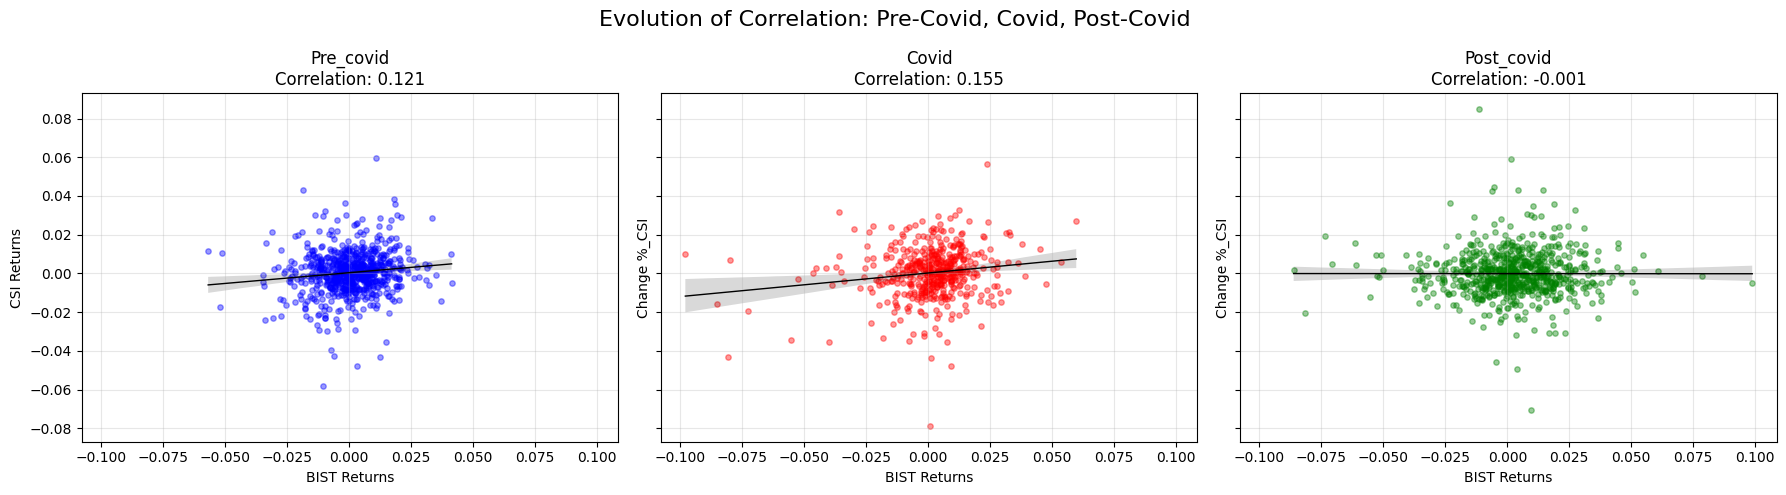

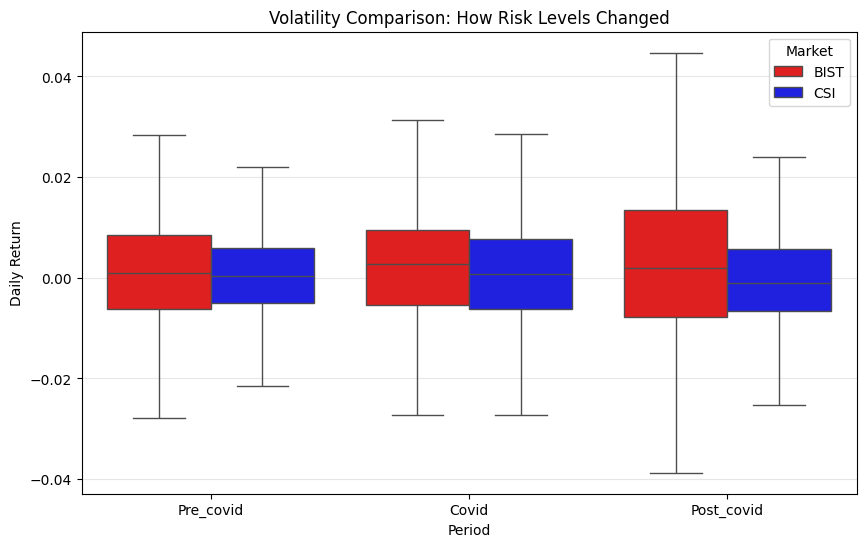

In [ ]:
periods = {
    "Pre_covid": ("2017-01-01", "2019-12-31"),
    "Covid":     ("2020-01-01", "2021-12-31"),
    "Post_covid":("2022-01-01", "2024-12-31")
}

fig, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=True)
colors = {"Pre_covid": "blue", "Covid": "red", "Post_covid": "green"}

boxplot_data_list = []

for i, (name, (start, end)) in enumerate(periods.items()):
  sub_df = df_combined.loc[start:end]

  corr = sub_df["Change %_BIST"].corr(sub_df["Change %_CSI"])

  print(f"{name}: Correlation = {corr:.4f} ({len(sub_df)} days)")

  ax = axes[i]
  ax.scatter(sub_df["Change %_BIST"], sub_df["Change %_CSI"], alpha=0.4, color=colors[name], s=15)

  sns.regplot(x="Change %_BIST", y="Change %_CSI", data=sub_df, ax=ax, scatter=False, line_kws={"color": "black", "linewidth": 1})

  ax.set_title(f"{name}\nCorrelation: {corr:.3f}")
  ax.set_xlabel("BIST Returns")
  if i == 0: ax.set_ylabel("CSI Returns")
  ax.grid(True, alpha=0.3)

  temp_bist = pd.DataFrame({
      "Daily Return": sub_df["Change %_BIST"],
      "Market": "BIST",
      "Period": name
  })
  boxplot_data_list.append(temp_bist)

  temp_csi = pd.DataFrame({
      "Daily Return": sub_df["Change %_CSI"],
      "Market": "CSI",
      "Period": name
  })
  boxplot_data_list.append(temp_csi)

plt.suptitle("Evolution of Correlation: Pre-Covid, Covid, Post-Covid", fontsize=16)
plt.tight_layout()
plt.show()

df_viz = pd.concat(boxplot_data_list)

plt.figure(figsize=(10,6))

sns.boxplot(data=df_viz, x="Period", y="Daily Return", hue="Market", palette={"BIST": "red", "CSI": "blue"}, showfliers=False)

plt.title("Volatility Comparison: How Risk Levels Changed")
plt.grid(True, axis="y", alpha=0.3)
plt.show()

## Risk and Performance Evaluation Against the Global Benchmark:
This part integrates MSCI World data into the combined dataset and evaluates the risk-return characteristics of BIST100 and CSI300 relative to the global market. After combining the data, the code computes key performance metrics -beta, sharpe ratio, maximum drawdown, and annualized volatility- for each index using MSCI World as the benchmark.

1.   Beta: Measures how sensitive the market is to movements in the benchmark.


  *   β = 1 -> moves in line with the global market.
  *   β > 1 -> more volatile than the market; amplifies market movements.
  *   β < 1 -> less volatile; moves more defensively.
  *   β < 0 -> moves opposite to global market trends.

2. Sharpe Ratio: Measures the risk-adjusted performance of an asset relative to a risk-free benchmark.


  *   Sharpe > 1 -> strong return relative to the risk taken.
  *   Around 0 -> returns barely compensate for risk.
  *   Sharpe < 0 -> market underperforms the risk-free rate.

3. Maximum Drawdown: Largest cumulative loss. Shows how much an investor could have lost in the worst-case scenario.

4. Annualized Volatility: Measures the yearly variability of returns. Low volatility means stable and consistent market behavior.









In [ ]:
print("Loading MSCI World Data")

df_MSCI = load_investing_data("MSCIWorld_data.csv")
df_MSCI.columns = [f"{col}_MSCI" for col in df_MSCI.columns]

print("Done!")

df_risk_analysis = pd.merge(df_combined, df_MSCI, left_index=True, right_index=True, how="inner")

print(f"Final Dataset Shape: {df_risk_analysis.shape}")

def metrics(df, asset_col, market_col, risk_free_rate=0.03):
  r_asset = df[asset_col]
  r_market = df[market_col]

  covariance = np.cov(r_asset, r_market)[0][1]
  market_variance = np.var(r_market)
  beta = covariance / market_variance

  ann_ret = r_asset.mean() * 252
  ann_vol = r_asset.std() * np.sqrt(252)
  sharpe = (ann_ret - risk_free_rate) / ann_vol

  wealth_index = (1 + r_asset).cumprod()
  previous_peaks = wealth_index.cummax()
  drawdown = (wealth_index - previous_peaks) / previous_peaks
  max_dd = drawdown.min()

  return beta, sharpe, max_dd, ann_vol

results = []
market_col = "Change %_MSCI"
assets = [
    ("BIST", "Change %_BIST"),
    ("CSI300", "Change %_CSI")
]

print("Risk Analysis vs MSCI World")

for name, asset_col in assets:
  beta, sharpe, max_dd, vol = metrics(df_risk_analysis, asset_col, market_col)

  results.append({
      "Index": name,
      "Beta": beta,
      "Sharpe": sharpe,
      "Drawdown": max_dd,
      "Ann. Volatility": vol
  })

df_results = pd.DataFrame(results).set_index("Index")

print(df_results.round(4))


Loading MSCI World Data
Done!
Final Dataset Shape: (2349, 18)
Risk Analysis vs MSCI World
          Beta  Sharpe  Drawdown  Ann. Volatility
Index                                            
BIST    0.4905  0.9331   -0.3141           0.2493
CSI300  0.3239  0.0174   -0.4833           0.2235


## Correlation Diagnostics (Pearson vs Spearman):
We evaluates the strength and structure of the relationship between daily returns of the BIST100 and CSI300 indices using Pearson and Spearman correlation measures.


*   **Pearson correlation** tests for linear dependence, showing whether two markets move together in a straight line relationship. The p-value indicates whether this linear relationship is statistically significant.
*   **Spearman correlation** instead measures monotonic association by ranking the returns.



In [ ]:
df_corr = df_combined.dropna()
x = df_corr["Change %_BIST"]
y = df_corr["Change %_CSI"]

pearson_r, pearson_p = stats.pearsonr(x, y)

spearman_r, spearman_p = stats.spearmanr(x, y)

print(f"Pearson Correlation (Linear): {pearson_r:.4f} (p-value: {pearson_p:.4e})")
print(f"Spearman Correlation (Rank): {spearman_r:.4f} (p-value: {spearman_p:.4e})")


Pearson Correlation (Linear): 0.0718 (p-value: 4.9646e-04)
Spearman Correlation (Rank): 0.0746 (p-value: 2.9581e-04)


## Conclusion from Pearson and Spearman Results:


*   Both correlations are very small (0.07) -> means almost no practical relationship between BIST and CSI daily returns.
*   Both p-values are extremely small -> the correlations are statistically significant.

Overall: Even though the correlations is statistically detectable due to large sample size, its magnitude is too small to have predictive or economic value.



## Period-Wise Correlation Analysis:
This code computes and compares the relationship between BIST100 and CSI300 returns across three major time period: Pre-Covid, Covid, Post-Covid. For each period, it calculates Pearson and Spearman correlation with their p-values. The results are printed out to show if the markets' interconnectedness increases during crisis times.

In [ ]:
results = {}

for name, (start, end) in periods.items():
  df_slice = df_combined.loc[start:end]

  if len(df_slice) > 0:
    x = df_slice["Change %_BIST"]
    y = df_slice["Change %_CSI"]

    pearson_r, pearson_p = stats.pearsonr(x, y)
    spearman_r, spearman_p = stats.spearmanr(x, y)

    results[name] = (pearson_r, pearson_p, spearman_r, spearman_p)


print(f"{'Period':<12} {'Pearson':<12} {'Pearson_p':<12} {'Spearman':<12} {'Spearman_p':<12}")
print("-" * 50)

for period, vals in results.items():
  pearson_r, pearson_p, spearman_r, spearman_p = vals

  print(f"{period:<12} "
          f"{pearson_r:<12.4f} "
          f"{pearson_p:<12.4f} "
          f"{spearman_r:<12.4f} "
          f"{spearman_p:<12.4f}")



Period       Pearson      Pearson_p    Spearman     Spearman_p  
--------------------------------------------------
Pre_covid    0.1210       0.0013       0.1145       0.0023      
Covid        0.1548       0.0008       0.1195       0.0097      
Post_covid   -0.0009      0.9818       0.0145       0.7021      


## Conclusion from Period-Wise Correlation Analysis:


*   Pre-Covid: Correlations are positive but very weak (0.12). Markets showed slight co-movement.
*   Covid Period: Correlations increase, which means a small rise in interconnectedness during Covid.
*   Post-Covid: Correlations collapse to near zero. This means no relationship at all between markets after Covid.

## Overall Interpretation:
The BIST100 and CSI300 show weak correlation before and during Covid, and no correlation after Covid. Even when statistically significant, the correlation magnitudes are too small. This indicates that the two markets operate largely independently, with only a slight increase in similarity during global crisis.



## **4.** **Hypothesis Testing:**


---

## Hypothesis Testing for the 10-Year Relationship:


*   Null Hypothesis (H0): There is no significant correlation between BIST100 and CSI300 daily returns.
*   Alternative Hypothesis (H1): There is a correlation.

Significance level α = 0.05

Pearson Correlation = 0.0718

Pearson p-value = 0.000496

Decision:

1.   If p < α -> reject H0
2.   If p >= α -> fail to reject H0

Conclusion: Statistically, we reject H0, and say there is a "significant correlation."





##

## Hypothesis Testing for Sub-Periods (Pre-Covid, Covid, Post-Covid):

*   Null Hypothesis (H0): There is no correlation between BIST100 and CSI300 daily returns in any of the three periods: Pre-Covid (2017-2019), Covid (2020-2021), Post-Covid (2022,2024).
*   Alternative Hypothesis (H1): There is a significant correlation between BIST100 and CSI300 daily returns in at least one of the periods.

Significance level α = 0.05


---


Pre-Covid Pearson = 0.1210

Pre-Covid Pearson p-value = 0.0013

Conclusion for Pre-Covid: Reject H0 -> statistically significant correlation.


---


Covid Pearson = 0.1548

Covid Pearson p-value = 0.0008

Conclusion for Covid: Reject H0 -> statistically significant correlation.


---


Post-Covid Pearson = -0.0009

Post-Covid Pearson p-value = 0.9818

Conclusion for Post-Covid: Fail to reject H0 -> no significant correlation.


